# Building Grade Exploration

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import pandas as pd
import plotly.express as px
from scipy.stats import percentileofscore

In [43]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [44]:
df = pd.read_csv("building-benchmarks.csv")

In [45]:
latest_year = df["DataYear"].max()

In [46]:
df_current = df.loc[df["DataYear"] == latest_year]
df_current.head()

,DataYear,ID,PropertyName,ReportingStatus,Address,ZIPCode,ChicagoEnergyRating,ExemptFromChicagoEnergyRating,CommunityArea,PrimaryPropertyType,...,SourceEUIPercentileRank,SiteEUIRank,SiteEUIPercentileRank,GHGIntensityRankByPropertyType,TotalGHGEmissionsRankByPropertyType,ElectricityUseRankByPropertyType,NaturalGasUseRankByPropertyType,GrossFloorAreaRankByPropertyType,SourceEUIRankByPropertyType,SiteEUIRankByPropertyType
0,2022,100001,Presence SMEMC St Elizabeth Campus,Submitted Data,1431 N Claremont Ave,60622,NaN,True,WEST TOWN,Mixed Use Property,...,0.9310,158.0000,0.9380,5.0000,14.0000,15.0000,9.0000,17.0000,5.0000,5.0000
2,2022,100019,Dixon Building,Submitted Data,411 - 415 S Wells St,60607,3.5000,False,LOOP,Office,...,0.4220,1519.0000,0.4040,224.5000,303.0000,306.0000,169.0000,315.0000,231.0000,145.0000
3,2022,100068,Joffco Square,Submitted Data,555 W Roosevelt Rd,60607,2.0000,False,NEAR WEST SIDE,Other - Mall,...,0.9440,484.0000,0.8110,1.0000,2.0000,2.0000,3.0000,2.0000,1.0000,2.0000
6,2022,100211,NaN,Submitted Data,73 E LAKE ST,60601,1.5000,False,LOOP,Multifamily Housing,...,0.7540,859.5000,0.6630,165.5000,194.0000,142.0000,299.0000,218.0000,158.5000,379.5000
7,2022,100252,NaN,Submitted Data,10426 S MICHIGAN AVE,60628,4.0000,False,ROSELAND,Multifamily Housing,...,0.1820,2448.5000,0.0400,1095.0000,1364.0000,1017.0000,1375.0000,1400.0000,1061.0000,1348.5000


In [47]:
print(f"There are {df_current.shape[0]} records for {latest_year}.")

There are 2549 records for 2022.


In [48]:
df.columns

Index(['DataYear', 'ID', 'PropertyName', 'ReportingStatus', 'Address',
       'ZIPCode', 'ChicagoEnergyRating', 'ExemptFromChicagoEnergyRating',
       'CommunityArea', 'PrimaryPropertyType', 'GrossFloorArea', 'YearBuilt',
       'NumberOfBuildings', 'WaterUse', 'ENERGYSTARScore', 'ElectricityUse',
       'NaturalGasUse', 'DistrictSteamUse', 'DistrictChilledWaterUse',
       'AllOtherFuelUse', 'SiteEUI', 'SourceEUI', 'WeatherNormalizedSiteEUI',
       'WeatherNormalizedSourceEUI', 'TotalGHGEmissions', 'GHGIntensity',
       'Latitude', 'Longitude', 'Location', 'Row_ID', 'Wards',
       'CommunityAreas', 'ZipCodes', 'CensusTracts',
       'HistoricalWards2003-2015', 'GHGIntensityRank',
       'GHGIntensityPercentileRank', 'TotalGHGEmissionsRank',
       'TotalGHGEmissionsPercentileRank', 'ElectricityUseRank',
       'ElectricityUsePercentileRank', 'NaturalGasUseRank',
       'NaturalGasUsePercentileRank', 'GrossFloorAreaRank',
       'GrossFloorAreaPercentileRank', 'SourceEUIRank',
    

## EDA Brainstorm

### Number of Records by Property Type

In [49]:
df_current["PrimaryPropertyType"].unique()

array(['Mixed Use Property', 'Office', 'Other - Mall',
       'Multifamily Housing', 'K-12 School',
       'Hospital (General Medical & Surgical)', 'Retail Store', 'Hotel',
       'Strip Mall', 'Senior Living Community', 'College/University',
       'Convention Center', 'Financial Office', 'Enclosed Mall',
       'Other - Entertainment/Public Assembly',
       'Fitness Center/Health Club/Gym', 'Medical Office', 'Other',
       'Library', 'Museum', 'Laboratory', 'Prison/Incarceration',
       'Other - Specialty Hospital', 'Supermarket/Grocery Store',
       'Wholesale Club/Supercenter', 'Residential Care Facility',
       'Movie Theater', 'Data Center', 'Other - Services',
       'Vehicle Dealership', 'Other - Recreation', 'Distribution Center',
       'Residence Hall/Dormitory', 'Performing Arts',
       'Other - Public Services', 'Worship Facility',
       'Pre-school/Daycare', 'Other - Lodging/Residential',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Education',
       'Ou

In [50]:
count_by_prop_type = df_current[["ID", "PrimaryPropertyType"]].groupby("PrimaryPropertyType").count().reset_index()
count_by_prop_type

,PrimaryPropertyType,ID
0,Adult Education,2
1,College/University,67
2,Convention Center,2
3,Courthouse,1
4,Data Center,4
5,Distribution Center,1
6,Enclosed Mall,5
7,Financial Office,3
8,Fitness Center/Health Club/Gym,10
9,Hospital (General Medical & Surgical),18


In [51]:
count_by_prop_type.ID.min()

1

In [52]:
count_by_prop_type.ID.max()

1409

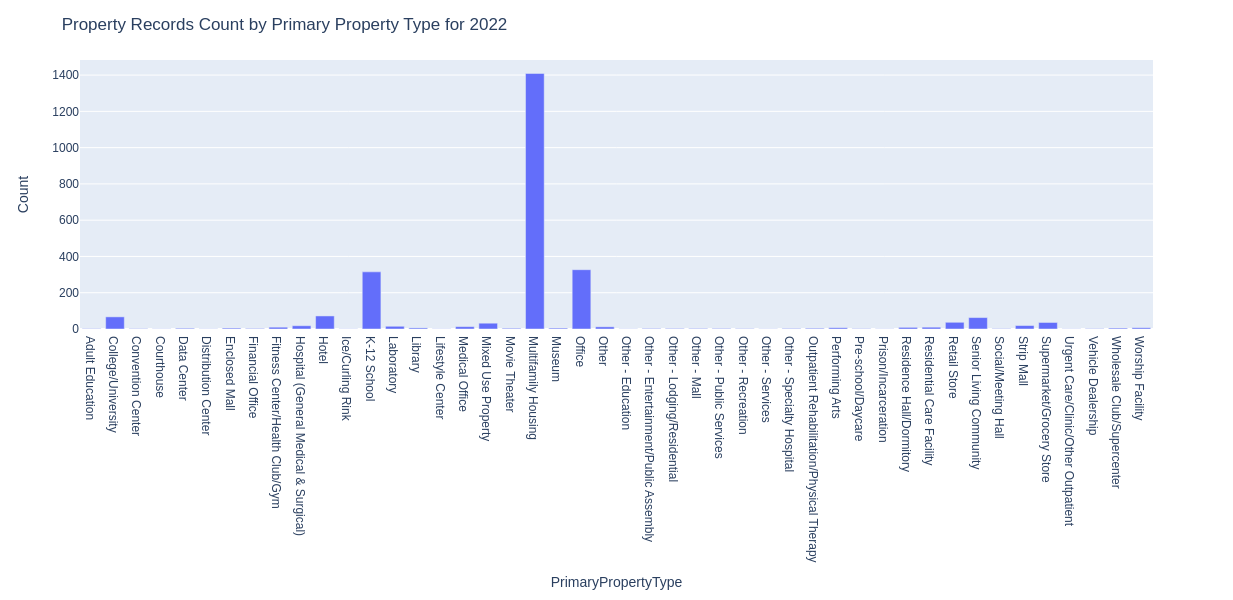

In [53]:
fig = px.bar(count_by_prop_type, x='PrimaryPropertyType', y='ID')

fig.update_layout(
    width=1200,
    height=600,
    title=f"Property Records Count by Primary Property Type for {latest_year}",
    yaxis_title='Count',
)

fig.show()

Conclusion: some categories are too sparse, so doing grading based on where a building stands compared to "peers" (same category) may be unreasonable. Unless we find data with corresponding categories but with more data points (e.g. national data).

## GHG Intensity Missingness and Distribution (Latest Year)

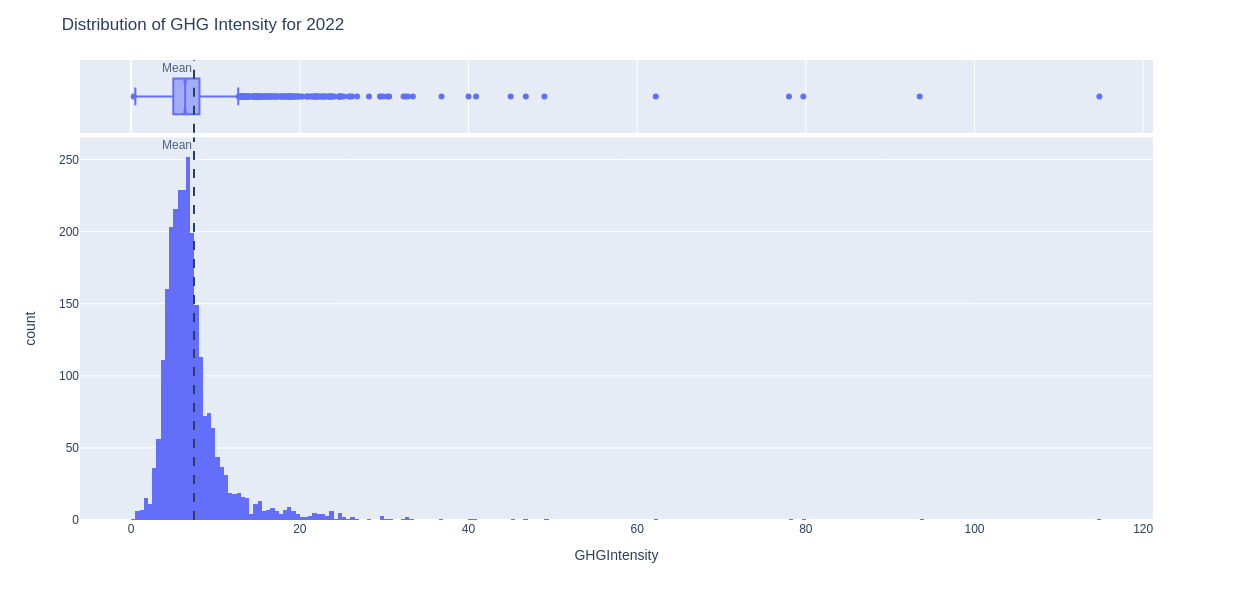

In [54]:
fig = px.histogram(
    df_current,
    x="GHGIntensity",
    marginal="box", # or violin, rug
    # hover_data=df.columns
)

# Calculate/graph mean
mean_value = df_current['GHGIntensity'].mean()
fig.add_vline(
    x=mean_value, 
    line_width=2, 
    line_dash="dash", 
    # line_color="red", 
    annotation_text="Mean", 
    annotation_position="top left",
    annotation=dict(
        text=f"Mean: {mean_value:.2f}",
        showarrow=False,
        x=mean_value,
        y=1,
        yref="paper",
        align="left",
        # bgcolor="red",
        opacity=0.8
    )
)

fig.update_layout(
    width=1200,
    height=600,
    title=f"Distribution of GHG Intensity for {latest_year}",
)

fig.show()

In [55]:
num_ghg_missing_latest_year = df_current['GHGIntensity'].isna().sum()
print(f"Number of records without GHGIntensity in {latest_year}: {num_ghg_missing_latest_year}")

Number of records without GHGIntensity in 2022: 0


## GHG Intensity Distribution by Property Type (Latest Year)

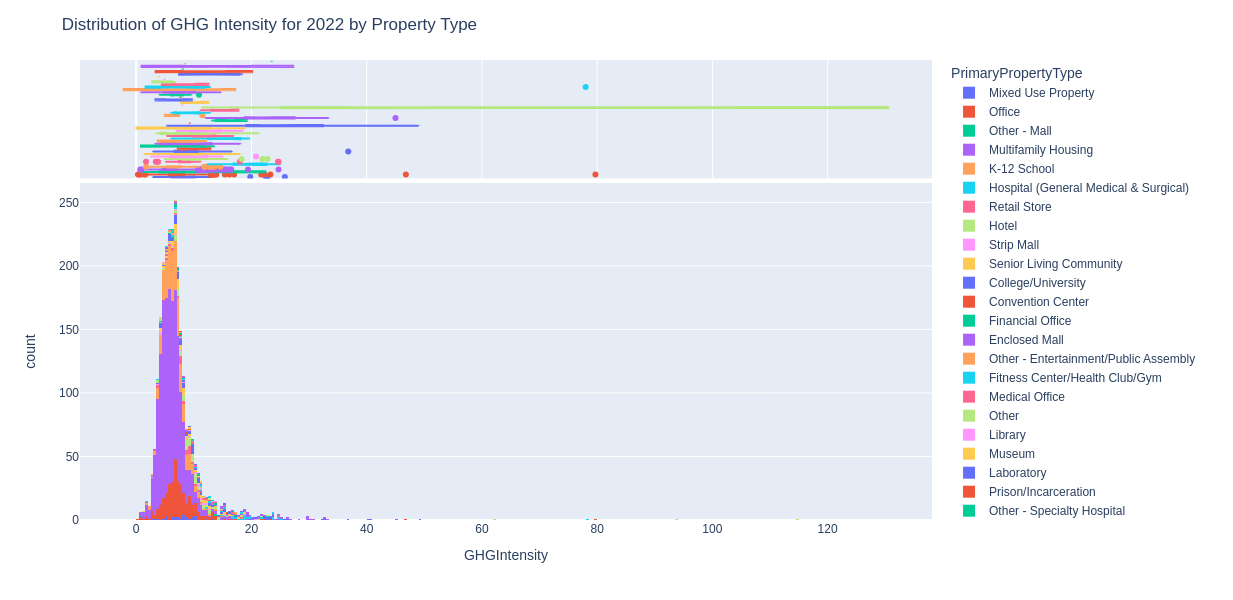

In [56]:
fig = px.histogram(
    df_current,
    x="GHGIntensity",
    marginal="box", # or violin, rug
    color="PrimaryPropertyType",
    # hover_data=df.columns
)


fig.update_layout(
    width=1200,
    height=600,
    title=f"Distribution of GHG Intensity for {latest_year} by Property Type",
)

fig.show()

## GHG Intensity vs Energy Star Rating (Latest Year)

In [57]:
missing_energy_star_num = df_current[["ENERGYSTARScore"]].isna().sum()
print(f"{missing_energy_star_num.iloc[0]} Energy Star Scores missing out of {df_current.shape[0]} for {latest_year}.")

310 Energy Star Scores missing out of 2549 for 2022.


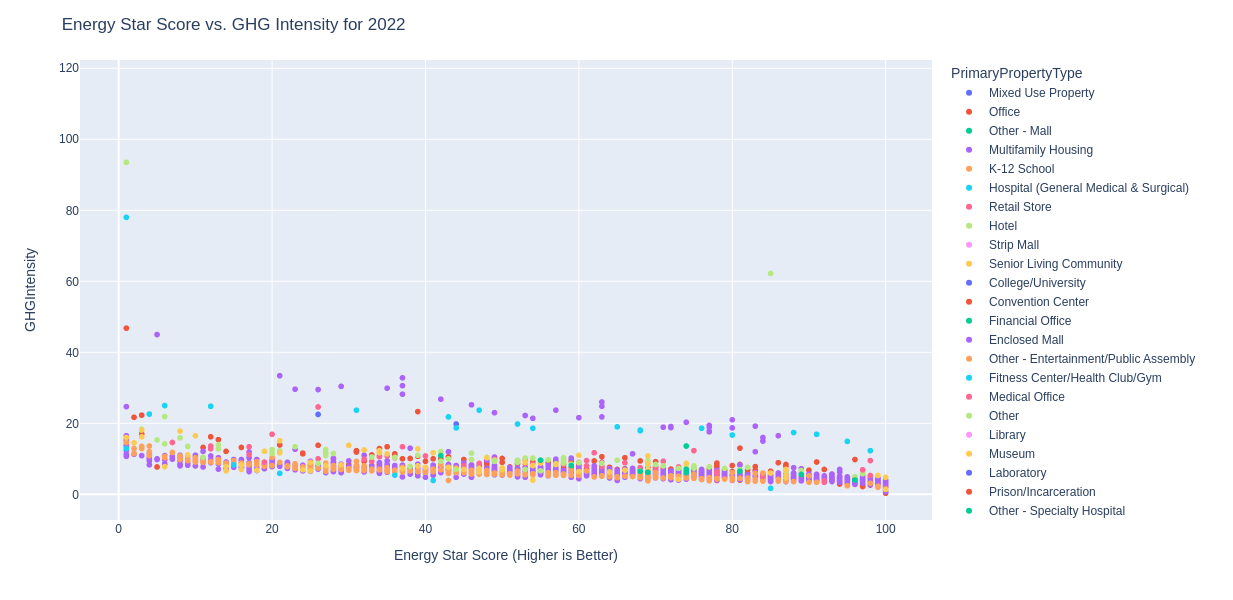

In [62]:
fig = px.scatter(
    df_current,
    y="GHGIntensity",
    x="ENERGYSTARScore",
    color="PrimaryPropertyType",
    hover_data=[
        "ID",
        "GHGIntensity",
        "ENERGYSTARScore",
        "PrimaryPropertyType"
    ],
)


fig.update_layout(
    width=1200,
    height=600,
    title=f"Energy Star Score vs. GHG Intensity for {latest_year}",
    xaxis_title='Energy Star Score (Higher is Better)',

    # hoverlabel=dict(
    #     bgcolor="white",
    #     font_size=16,
    #     font_family="Rockwell"
    # )
)

fig.show()

TODO: anomaly detection: new issue
- across years; dramatic changes in GHG Intensity
    - Flag anomalous data pre-grading
    - by percentage change
    - E.g. Maybe due to vacancy
- 

In [19]:
correlation = df_current['ENERGYSTARScore'].corr(df_current['GHGIntensity'])

print(f"Correlation between ENERGYSTARScore and GHGIntensity: {correlation}")

Correlation between ENERGYSTARScore and GHGIntensity: -0.4845977490329846


Conclusion: Generally, higher Energy Star Score is (linearly) associated with lower GHG Intensity, as expected. But not all of GHG Intensity can be (linearly) explained by the Energy Star Score alone; about half is unaccounted for.

## Grading

### GHG Intensity

#### GHG Intensity Grade: Year-Based Percentile

Interpretation: Percentile grade of e.g. `56.3450` means that this building performs "better" than `56.3450%` of all buildings for the corresponding year.

Assign Grades:

In [20]:
from grading_funcs import generate_energy_int_grade, generate_percentile_grade

In [21]:
ghg_intensity_grades_df = generate_energy_int_grade(
    df=df, year=latest_year, cols_to_keep=["ID", "DataYear", "GHGIntensity"]
)
ghg_intensity_grades_df

,ID,DataYear,GHGIntensity,GHGIntensityPercentileGrade,GHGIntensityLetterGrade
0,100001,2022,13.0000,6.8262,F
2,100019,2022,6.0000,56.3750,C
3,100068,2022,13.9000,5.7670,F
6,100211,2022,8.1000,24.4802,D
7,100252,2022,4.5000,82.8953,A
...,...,...,...,...,...
3383,260118,2022,4.2000,87.0537,A
3385,260127,2022,5.9000,58.7681,C
3386,260129,2022,10.7000,11.0632,F
3387,260132,2022,7.3000,33.4641,D


##### Explore Grades:

###### GHG Intensity Percentile Grade Distribution

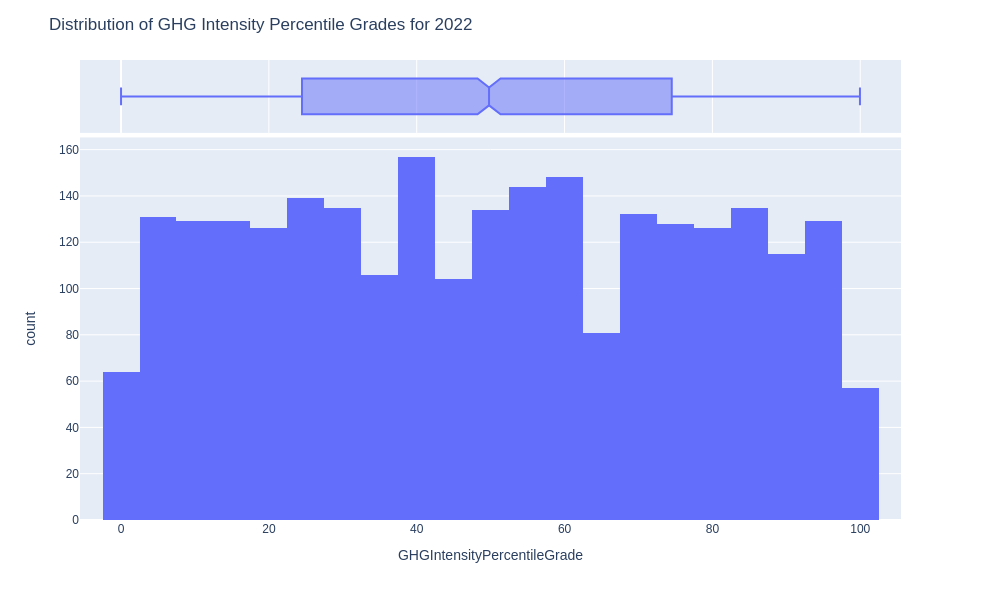

In [22]:
fig = px.histogram(
    ghg_intensity_grades_df,
    x="GHGIntensityPercentileGrade",
    marginal="box", # or violin, rug
)

fig.update_layout(
    width=1200,
    height=600,
    title=f"Distribution of GHG Intensity Percentile Grades for {latest_year}",
)

fig.show()

##### GHG Intensity Percentile Grade vs GHG Intensity

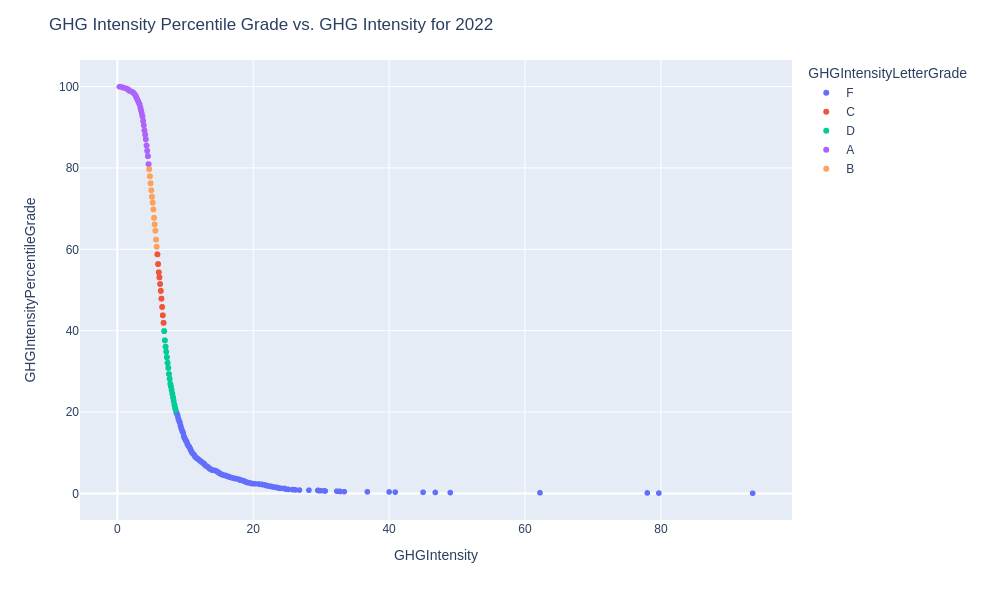

In [23]:
fig = px.scatter(
    ghg_intensity_grades_df,
    x="GHGIntensity",
    y="GHGIntensityPercentileGrade",
    color="GHGIntensityLetterGrade",
)

fig.update_layout(
    width=1200,
    height=600,
    title=f"GHG Intensity Percentile Grade vs. GHG Intensity for {latest_year}",
)

fig.show()
# TODO: link via ID in the tooltip or just by ID with `https://electrifychicago.net/building-id/:buildingId`

##### Limitations of this grading method:

- Is not a peer-to-peer comparison; e.g. a 24/7 hospital would be graded with the same methodology as an office building.
- Even if all buildings as a whole emit less and less GHG year-over-year, there will always be the same proportion of them in each letter grade category within each given year. I.e. there will always be 1/5 of building receiving each particular grade within each year => should there be instead a reference (index/benchmark) year? Or a different grading methodology that accounts for improvement over time?
- An alternative: do similar to Energy Star Scores: calculate a building's expected GHG Intensity via OLS linear regression based on its peers, then do ratio between actual GHG Intensity and its predicted value, then do percentile score. OLS can be run using [Building Performance Database (BPD) Application Programming Interface (API)](https://buildings.lbl.gov/cbs/bpd-api-documentation/).

### Energy Mix

#### Energy Mix Grade: Simple Arbitrary Weight Score

Interpretation: Percentile grade of e.g. `56.3450` means that this building performs "better" than `56.3450%` of all buildings for the corresponding year. The score used for the Percentile Grade calculation is a weighted sum of percentages of each energy source for a corresponding building. 

In [24]:
from grading_funcs import generate_energymix_grade

In [25]:
energymix_cols_to_keep = [
    "ID",
    "DataYear",
    "ElectricityUse",
    "NaturalGasUse",
    "DistrictSteamUse",
    "DistrictChilledWaterUse",
    "AllOtherFuelUse"
]
energymix_grades_df = generate_energymix_grade(df, year=2022, cols_to_keep=energymix_cols_to_keep)
energymix_grades_df

,ID,DataYear,ElectricityUse,NaturalGasUse,DistrictSteamUse,DistrictChilledWaterUse,AllOtherFuelUse,EnergyMix,EnergyMixPercentileGrade,EnergyMixLetterGrade
0,100001,2022,16795066.2000,33899078.5000,0.0000,0.0000,NaN,99.6953,45.1942,C
2,100019,2022,1641381.8000,2465232.2000,0.0000,0.0000,NaN,109.9538,56.3750,C
3,100068,2022,8354489.4000,331613.0000,0.0000,0.0000,NaN,194.2734,93.2130,A
6,100211,2022,12253233.4000,14931549.6000,0.0000,0.0000,NaN,117.6108,63.7897,B
7,100252,2022,1550327.6000,110041.9000,0.0000,0.0000,NaN,190.0587,92.8207,A
...,...,...,...,...,...,...,...,...,...,...
3383,260118,2022,669935.5000,3679236.0000,0.0000,0.0000,NaN,73.1056,9.0231,F
3385,260127,2022,7924051.9000,3717569.9000,0.0000,0.0000,NaN,152.0998,85.5237,A
3386,260129,2022,2750911.1000,3444364.9000,0.0000,0.0000,NaN,116.6050,63.0051,B
3387,260132,2022,4204386.8000,2280683.7000,0.0000,0.0000,NaN,147.2477,84.1899,A


##### Explore Grades:

#### Energy Mix Grade: Score Weighted Using GHG Emission Factor 

Interpretation: Same as the Simple Arbitrary Weight Score above, except weights are calculated off of the GHG Emission factos used by Energy Star.

These data are from [`Energy Star's Historical Greenhouse Gas Factors, 2000 – present`](file:///home/tyansg/Zotero/storage/7UM5TEDU/historical-greenhouse-gas-factors-2000-present.html). When the `Subregion` is `NaN`, Energy Uses the national factor (i.e. no division by subregion for those energy sources).

In [26]:
basic_rows_to_skip = [0, 1, 2]

direct_ghg_emissions_factors_df = pd.read_excel(
    "Historical_GHG_Factors.xlsx",
    sheet_name="US Emission Factors",
    usecols="A:AA",
    skiprows=basic_rows_to_skip + [4],
    nrows=11,
)

direct_ghg_emissions_factors_df

,Fuel Type,Subregion,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Natural Gas,NaN,53.0720,53.0720,53.0720,53.0720,53.0720,53.0720,53.0720,53.0720,...,53.1148,53.1148,53.1148,53.1148,53.1148,53.1148,53.1148,53.1145,53.1145,53.1145
1,Propane,NaN,61.4956,61.4956,61.4956,61.4956,61.4956,61.4956,61.4956,61.4956,...,64.2480,64.2480,64.2480,64.2480,64.2480,64.2480,64.2480,61.9530,61.9530,61.9530
2,Fuel Oil (No. 1),NaN,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,...,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,73.4930,73.4930,73.4930
3,Fuel Oil (No. 2),NaN,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,...,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2030,74.2030,74.2030
4,Fuel Oil (No. 4),NaN,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,...,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,75.2830,75.2830,75.2830
5,Fuel Oil (No. 5 & No. 6),NaN,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,...,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,74.2580,74.2580,74.2580
6,Diesel,NaN,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,...,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,75.1630,75.1630,75.1630
7,Coal (anthracite),NaN,104.2670,104.2670,104.2670,104.2670,104.2670,104.2670,104.2670,104.2670,...,104.4418,104.4418,104.4418,104.4418,104.4418,104.4418,104.4418,104.4220,104.4220,104.4220
8,Coal (bituminous),NaN,94.1270,94.1270,94.1270,94.1270,94.1270,94.1270,94.1270,94.1270,...,94.0318,94.0318,94.0318,94.0318,94.0318,94.0318,94.0318,94.0120,94.0120,94.0120
9,Coke,NaN,102.7670,102.7670,102.7670,102.7670,102.7670,102.7670,102.7670,102.7670,...,114.4218,114.4218,114.4218,114.4218,114.4218,114.4218,114.4218,114.4020,114.4020,114.4020


In [27]:
indirect_ghg_emissions_district_fuels_df = pd.read_excel(
    "Historical_GHG_Factors.xlsx",
    sheet_name="US Emission Factors",
    usecols="A:AA",
    skiprows=basic_rows_to_skip + list(range(basic_rows_to_skip[-1] + 2, 17)),
    nrows=5,
)

indirect_ghg_emissions_district_fuels_df

,Fuel Type,Subregion,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,District Steam,NaN,88.5385,88.5385,88.5385,88.5385,88.5385,88.5385,88.5385,88.5385,...,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985
1,District Hot Water,NaN,88.5385,88.5385,88.5385,88.5385,88.5385,88.5385,88.5385,88.5385,...,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985,66.3985
2,District Chilled Water - Electric Driven Chiller,NaN,52.7047,52.7047,52.7047,52.7047,52.7047,52.7047,52.7047,52.7047,...,52.7004,52.7004,52.7004,52.7004,52.7004,52.7004,52.7004,52.7004,52.7004,52.7004
3,District Chilled Water - Absorption Chiller us...,NaN,73.8636,73.8636,73.8636,73.8636,73.8636,73.8636,73.8636,73.8636,...,73.8893,73.8893,73.8893,73.8893,73.8893,73.8893,73.8893,73.8893,73.8893,73.8893
4,District Chilled Water - Engine-Driven Chiller...,NaN,49.2905,49.2905,49.2905,49.2905,49.2905,49.2905,49.2905,49.2905,...,49.3082,49.3082,49.3082,49.3082,49.3082,49.3082,49.3082,49.3082,49.3082,49.3082


In [28]:
biomass_ghg_emissions_district_fuels_df = pd.read_excel(
    "Historical_GHG_Factors.xlsx",
    sheet_name="US Emission Factors",
    usecols="A:AA",
    skiprows=basic_rows_to_skip + list(range(basic_rows_to_skip[-1] + 2, 23)),
    nrows=1,
)

biomass_ghg_emissions_district_fuels_df

,Fuel Type,Subregion,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Wood,NaN,95.7740,95.7740,95.7740,95.7740,95.7740,95.7740,95.7740,95.7740,...,95.0528,94.2227,94.2227,95.0528,95.0528,95.0528,95.0528,94.9556,94.9556,94.9556


In [29]:
# Chicago is in RFCW subregion, based on https://portfoliomanager.energystar.gov/pdf/reference/Emissions.pdf
indirect_ghg_emissions_electricity_df = pd.read_excel(
    "Historical_GHG_Factors.xlsx",
    sheet_name="US Emission Factors",
    usecols="A:AA",
    skiprows=basic_rows_to_skip + list(range(basic_rows_to_skip[-1] + 2, 25)),
    nrows=28,
)
indirect_ghg_emissions_electricity_df = indirect_ghg_emissions_electricity_df.loc[indirect_ghg_emissions_electricity_df["Subregion"] == "RFCW"]
indirect_ghg_emissions_electricity_df

,Fuel Type,Subregion,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
18,Electricity - Grid,RFCW,205.5095,205.5095,205.5095,205.5095,205.5095,205.5095,205.5095,207.3702,...,184.8948,166.3642,166.3642,156.0693,142.8265,131.7142,139.9196,133.7058,133.7058,133.7058


In [30]:
# Combine all GHG Emission factors into a single DF for ease of handling:
emission_factors_dfs = [
    direct_ghg_emissions_factors_df,
    indirect_ghg_emissions_district_fuels_df,
    biomass_ghg_emissions_district_fuels_df,
    indirect_ghg_emissions_electricity_df,
]
emission_factors_df = pd.concat(emission_factors_dfs).reset_index(drop=True)
emission_factors_df

,Fuel Type,Subregion,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Natural Gas,NaN,53.0720,53.0720,53.0720,53.0720,53.0720,53.0720,53.0720,53.0720,...,53.1148,53.1148,53.1148,53.1148,53.1148,53.1148,53.1148,53.1145,53.1145,53.1145
1,Propane,NaN,61.4956,61.4956,61.4956,61.4956,61.4956,61.4956,61.4956,61.4956,...,64.2480,64.2480,64.2480,64.2480,64.2480,64.2480,64.2480,61.9530,61.9530,61.9530
2,Fuel Oil (No. 1),NaN,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,...,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,73.4990,73.4930,73.4930,73.4930
3,Fuel Oil (No. 2),NaN,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,...,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2030,74.2030,74.2030
4,Fuel Oil (No. 4),NaN,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,...,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,75.2890,75.2830,75.2830,75.2830
5,Fuel Oil (No. 5 & No. 6),NaN,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,...,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,75.3490,74.2580,74.2580,74.2580
6,Diesel,NaN,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,...,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,74.2090,75.1630,75.1630,75.1630
7,Coal (anthracite),NaN,104.2670,104.2670,104.2670,104.2670,104.2670,104.2670,104.2670,104.2670,...,104.4418,104.4418,104.4418,104.4418,104.4418,104.4418,104.4418,104.4220,104.4220,104.4220
8,Coal (bituminous),NaN,94.1270,94.1270,94.1270,94.1270,94.1270,94.1270,94.1270,94.1270,...,94.0318,94.0318,94.0318,94.0318,94.0318,94.0318,94.0318,94.0120,94.0120,94.0120
9,Coke,NaN,102.7670,102.7670,102.7670,102.7670,102.7670,102.7670,102.7670,102.7670,...,114.4218,114.4218,114.4218,114.4218,114.4218,114.4218,114.4218,114.4020,114.4020,114.4020


In [31]:
# Check that there is nothing in the unknown fuel category; so that we ignore this fuel source in this grade's calculation:
assert df.AllOtherFuelUse.isna().sum() == df.shape[0]

In [32]:
emission_factors_latest_year: pd.DataFrame = emission_factors_df.loc[
    :,
    ["Fuel Type", str(latest_year)],
]
emission_factors_latest_year

,Fuel Type,2022
0,Natural Gas,53.1145
1,Propane,61.9530
2,Fuel Oil (No. 1),73.4930
3,Fuel Oil (No. 2),74.2030
4,Fuel Oil (No. 4),75.2830
5,Fuel Oil (No. 5 & No. 6),74.2580
6,Diesel,75.1630
7,Coal (anthracite),104.4220
8,Coal (bituminous),94.0120
9,Coke,114.4020


In [33]:
# Since the building dataset doesn't specify what kind of District Chilled Water is used, take the mean of all three types:
chilled_water_title = "District Chilled Water"
chilled_water_filter = emission_factors_latest_year["Fuel Type"].str.contains(chilled_water_title)
chilled_water_factor_mean = emission_factors_latest_year.loc[
    chilled_water_filter,
    str(latest_year)
].mean()
chilled_water_factor_mean

58.632611112222236

In [34]:
chilled_water_row = {
    "Fuel Type": chilled_water_title,
    str(latest_year): chilled_water_factor_mean,
}
chilled_water_row

{'Fuel Type': 'District Chilled Water', '2022': 58.632611112222236}

In [35]:
chilled_water_row_df = pd.DataFrame([chilled_water_row])
chilled_water_row_df

,Fuel Type,2022
0,District Chilled Water,58.6326


In [36]:
emission_factors_processed = emission_factors_latest_year.loc[
    ~chilled_water_filter
]
emission_factors_processed = pd.concat([emission_factors_processed, chilled_water_row_df], ignore_index=True)
emission_factors_processed

,Fuel Type,2022
0,Natural Gas,53.1145
1,Propane,61.9530
2,Fuel Oil (No. 1),73.4930
3,Fuel Oil (No. 2),74.2030
4,Fuel Oil (No. 4),75.2830
5,Fuel Oil (No. 5 & No. 6),74.2580
6,Diesel,75.1630
7,Coal (anthracite),104.4220
8,Coal (bituminous),94.0120
9,Coke,114.4020


In [37]:
# Map column names from the buildings dataset to the fuel type:
energy_use_to_factors_map = {
    "ElectricityUse": "Electricity - Grid",
    "NaturalGasUse": "Natural Gas",
    "DistrictSteamUse": "District Steam",
    "DistrictChilledWaterUse": "District Chilled Water",
}
energy_use_to_factors_map.keys()

dict_keys(['ElectricityUse', 'NaturalGasUse', 'DistrictSteamUse', 'DistrictChilledWaterUse'])

In [38]:
emission_factors_processed.loc[
    emission_factors_processed["Fuel Type"].isin(list(energy_use_to_factors_map.keys()))
]

,Fuel Type,2022


In [39]:
# Convert emission factors to weights:


In [40]:
energy_source_cols

NameError: name 'energy_source_cols' is not defined

#### Reporting Years (not reporting is bad)

In [ ]:
df.loc[:, "ReportingStatus"].unique()

In [ ]:
df.loc[:, "ReportingStatus"].isna().sum()

In [ ]:
df.loc[:, "DataYear"].unique()

Conclusion: 
There don't seem to be any "unreported" years, assuming "Submitted Data" counts as "reporting" (?)

In [ ]:
df.loc[:, "GHGIntensity"].isna().sum()

In [ ]:
df.loc[df["GHGIntensity"] == 0]

In [ ]:
# TODO: Move stuff into proper places
# TODO: get missing building into the CSV, via `get_submitted_data`